In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file
import numpy as np

In [31]:
# the cleaned CSV data file is in the data directory
bank_data = pd.read_csv('../data/bank_data_cleaned.csv')

In [32]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


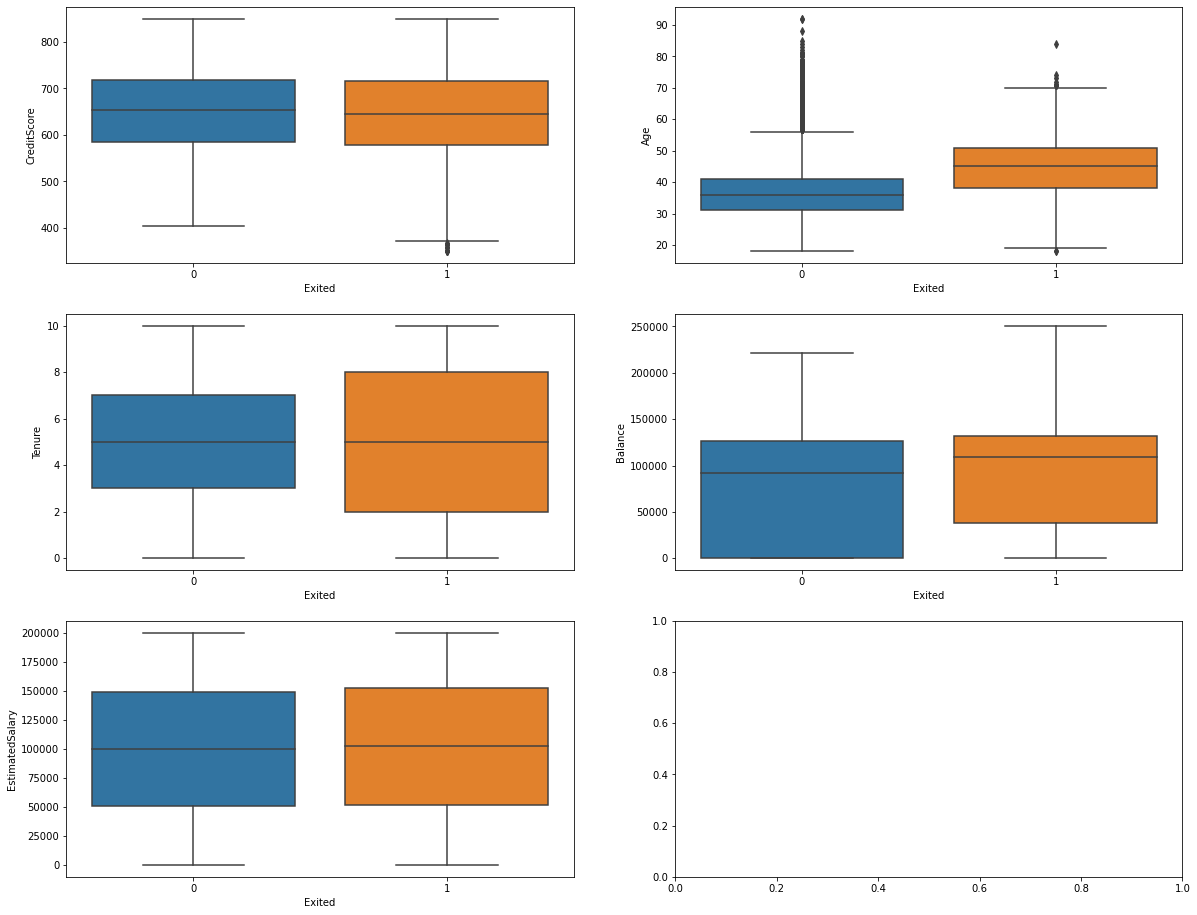

In [37]:
features=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
fig, axarr = plt.subplots(3, 2, figsize=(20, 16))
for idx, f in enumerate(features):
    r=(idx//2)
    c=(0 if idx%2==0 else 1)
    sns.boxplot(data=bank_data, x="Exited", y=f, ax=axarr[r][c])
plt.show();

In [35]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Exited', data=bank_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Churn')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

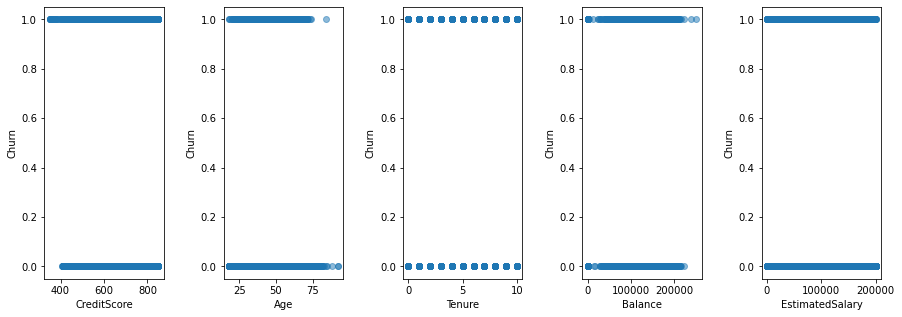

In [40]:
scatterplots(features, ncol=5, figsize=(15, 5))